# Your First Algorithm of Machine Learning (ML) - Linear Regression Proyect
## Table of contents
### Explore Data Analysis (EDA)

* [0. Problem Statement](#co)
* [1. Importing libraries](#c1)
* [2. Data Collection](#c2)
* [3. Exploration and Data Cleaning](#c3)
  * [3.1 Drop Duplicate Information](#c3-1)
  * [3.2 Drop Irrelevant Information](#c3-2)
* [4. Univariate Analysis](#c4)
  * [4.1 Dividing our dataset into categorical and numerical](#c4-1)
  * [4.2 Categorical Variable Analysis](#c4-2)
  * [4.3 Numerical Variable Analysis](#c4-3)
* [5. Multivariate Analysis](#c5)
  * [5.1 Categorical-Categorical Analysis](#c5-1)
  * [5.2 Encoding Categorical Values and Saving JSON Files](#c5-2)
  * [5.3 Numerical-Categorical Analysis](#c5-3)
* [6. Feature Engineering](#c6)
  * [6.1 New Feature Inference](#c6-1)
  * [6.2 Outliers Analysis](#c6-2)
  * [6.3 Missing Values Analysis](#c6-3)
  * [6.4 Split train/test of both Data Frames](#c6-4)
* [7. Data Processing](#c7)
  * [7.1 Normalization](#c7-1)
  * [7.2 Minmax Scalation](#c7-2)

### Machine Learning
* [8. Machine Learning](#c8)
  * [8.1 Which is the best dataset?](#c8-1)
  * [8.2 Model Optimization](#c8-2)
  * [8.3 Evaluation of the Model](#c8-3)

## 0. Problem Statement <a id='c0'></a>
The objective of this exercise is to conduct an in-depth analysis of the bank marketing campaign dataset with an EDA. We'll then develop a predictive model to determine if there is any relationship between health resources and sociodemographic data at the US county level.

## 1. Importing libraries <a id='c1'></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import json
import warnings
import pickle
from pickle import dump
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


def warn(*args, **kwargs):
    pass


warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option("display.max_columns", None)

## 2. Data Collection <a id='c2'></a>

In [ ]:
URL = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"


def get_data(URL: str) -> pd.DataFrame:
    total_data = pd.read_csv(URL, sep=",")
    total_data.head()
    return total_data


get_data(URL)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## 3. Exploration and Data Cleaning <a id='c3'></a>

In [12]:
total_data = get_data(URL)

#### 3.1 Drop Duplicate Information <a id='c3-1'></a>

In this case, we don't delete any row beacause there is no duplicated data

In [13]:
nan_columns = total_data.isna().sum()
print(nan_columns[nan_columns > 0])

Series([], dtype: int64)


#### 3.2 Drop Irrelevant Information <a id='c3-2'></a>

We'll don't delete as well any row because there is no irrelevant data but we will improve the datatypes so there is not any extra information that we don't need.

In [ ]:
total_data["bmi"] = round(total_data["bmi"], 2)
total_data["charges"] = round(total_data["charges"], 2)

0    27.90
1    33.77
2    33.00
3    22.70
4    28.88
Name: bmi, dtype: float64


## 4. Univariate Analysis <a id='c4'></a>

### 4.1 Dividing our dataset into categorical and numerical <a id='c4-1'></a>

In [ ]:
numerical_variables = total_data.select_dtypes(include=["number"]).columns.tolist()
print("Numerical Variables:", numerical_variables)

categorical_variables = total_data.select_dtypes(
    include=["object", "category"]
).columns.tolist()
print("Categorical Variables:", categorical_variables)

print(total_data.dtypes)

Numerical Variables: ['age', 'bmi', 'children', 'charges']
Categorical Variables: ['sex', 'smoker', 'region']
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


### 4.2 Categorical Variable Analysis <a id='c4-2'></a>

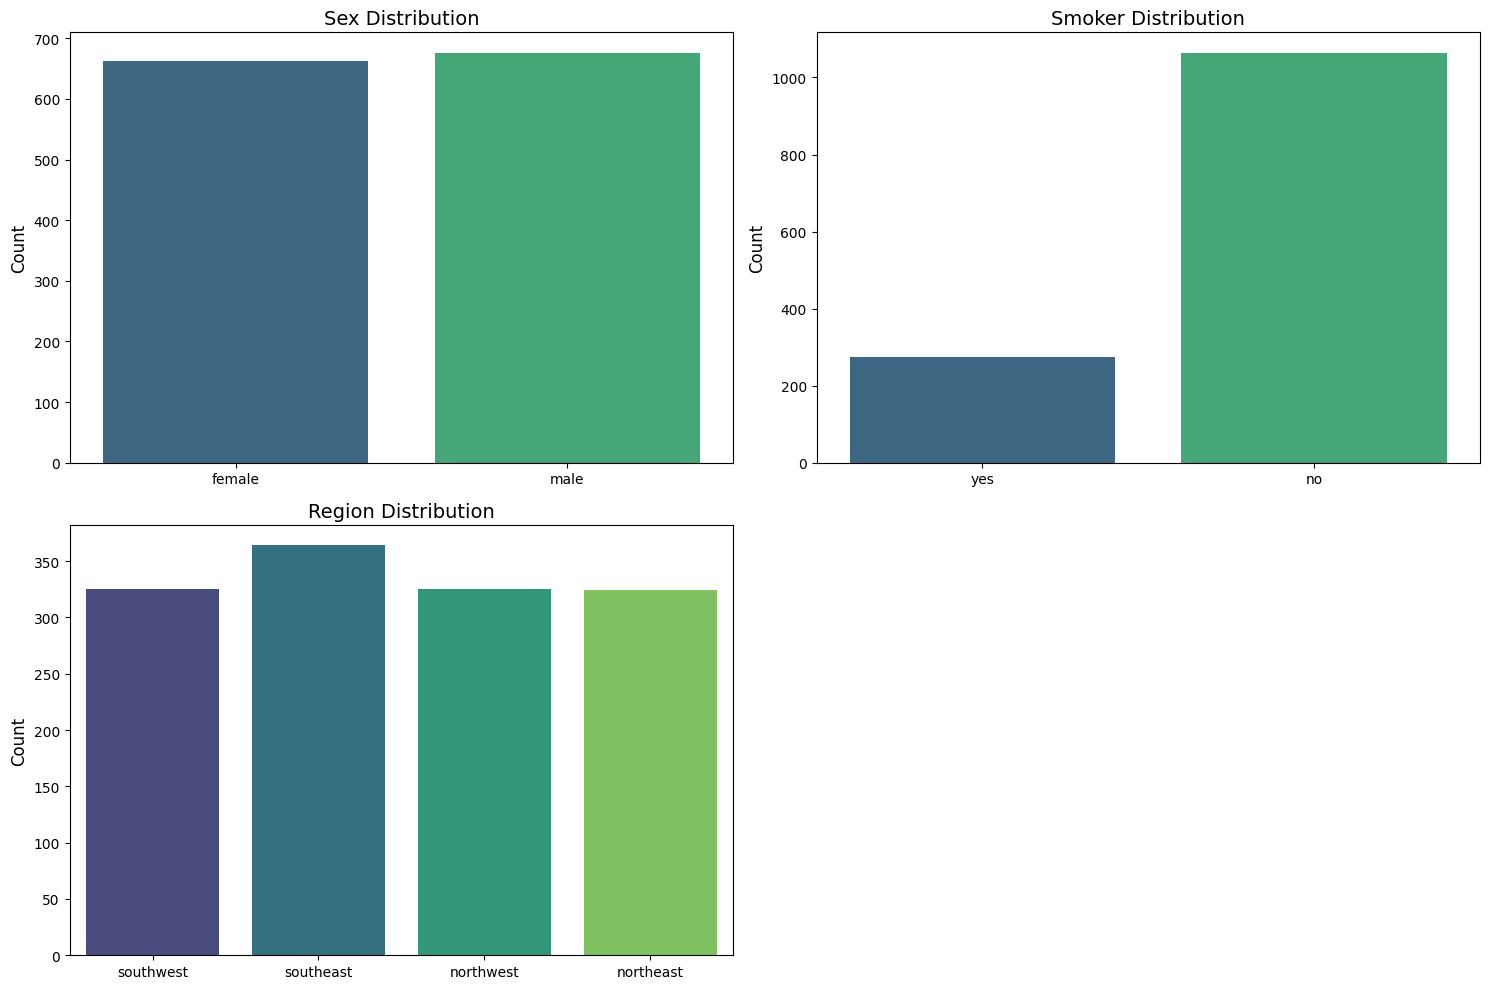

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# --- Plot for 'sex' (Row 0, Column 0) ---
sns.countplot(data=total_data, x = "sex", ax=axes[0,0], palette='viridis')
axes[0, 0].set_title("Sex Distribution", fontsize=14)
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Count', fontsize=12)

# --- Plot for 'smoker' (Row 0, Column 1) ---
sns.countplot(data=total_data, x = "smoker", ax=axes[0,1], palette='viridis')
axes[0, 1].set_title("Smoker Distribution", fontsize=14)
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Count', fontsize=12)

# --- Plot for 'region' (Row 1, Column 0) ---
sns.countplot(data=total_data, x = "region", ax=axes[1,0], palette='viridis')
axes[1, 0].set_title("Region Distribution", fontsize=14)
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Count', fontsize=12)

fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()

**Conclusions**:

- **Sex**: There is no significant difference between male and female in terms of distribution.
- **Smoker**: The vast majority of the population is non-smoker, with around a 20 percentage of smokers. This imbalanced distribution will be a significant factor for the model.
- **Region**: This is a relatively balanced distribution, with the South being the most represented region. This will be a significant factor too for the model.

### 4.3 Numerical Variable Analysis <a id='c4-3'></a>

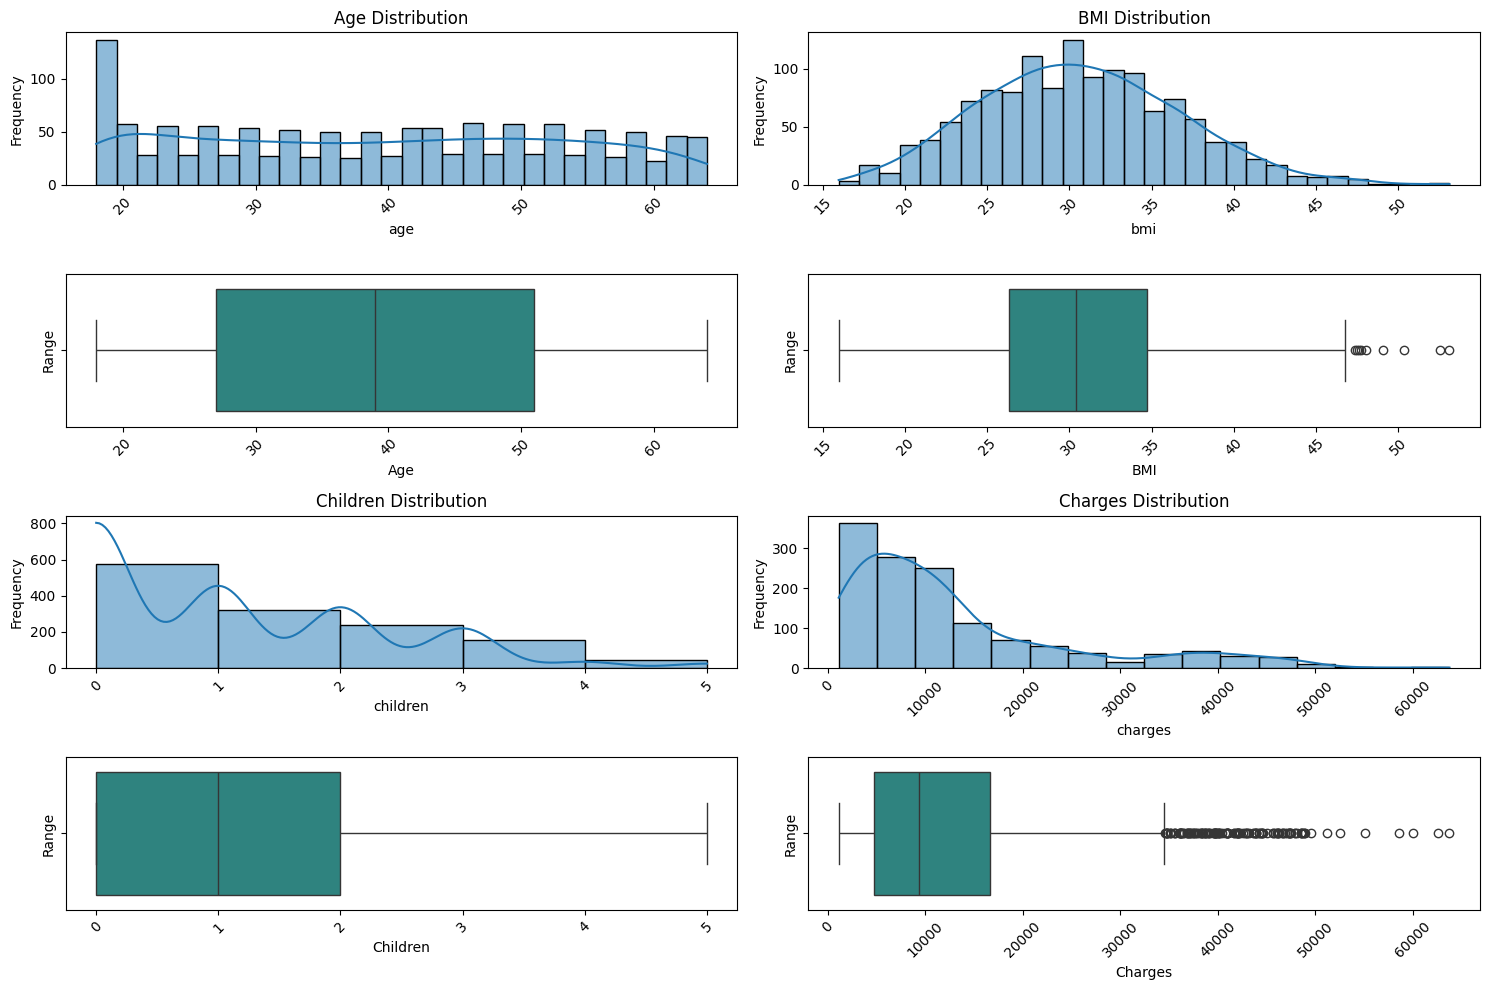

In [30]:
fig, axes = plt.subplots(4, 2, figsize=(15, 10))

#['age', 'bmi', 'children', 'charges']
# --- Plot for 'age' (Row 0, Column 0) ---
sns.histplot(
    data=total_data, x="age", kde=True, bins=30, ax=axes[0, 0], palette="viridis"
)
axes[0, 0].set_title("Age Distribution", fontsize=12)
axes[0, 0].set_ylabel("Frequency", fontsize=10)
axes[0, 0].tick_params(axis="x", rotation=45)

# Boxplot for 'age'
sns.boxplot(data=total_data, x="age", ax=axes[1, 0], palette="viridis")
axes[1, 0].set_ylabel("Range", fontsize=10)
axes[1, 0].set_xlabel("Age", fontsize=10)
axes[1, 0].tick_params(axis="y", labelleft=False)
axes[1, 0].tick_params(axis="x", rotation=45)


# --- Plot for 'bmi' (Row 0, Column 1) ---
sns.histplot(
    data=total_data, x="bmi", kde=True, bins=30, ax=axes[0, 1], palette="viridis"
)
axes[0, 1].set_title("BMI Distribution", fontsize=12)
axes[0, 1].set_ylabel("Frequency", fontsize=10)
axes[0, 1].tick_params(axis="x", rotation=45)

# Boxplot for 'bmi'
sns.boxplot(data=total_data, x="bmi", ax=axes[1, 1], palette="viridis")
axes[1, 1].set_ylabel("Range", fontsize=10)
axes[1, 1].set_xlabel("BMI", fontsize=10)
axes[1, 1].tick_params(axis="y", labelleft=False)
axes[1, 1].tick_params(axis="x", rotation=45)


# --- Plot for 'children' (Row 1, Column 0) ---
sns.histplot(
    data=total_data, x="children", kde=True, bins=5, ax=axes[2, 0], palette="viridis"
)
axes[2, 0].set_title("Children Distribution", fontsize=12)
axes[2, 0].set_ylabel("Frequency", fontsize=10)
axes[2, 0].tick_params(axis="x", rotation=45)

# Boxplot for 'children'
sns.boxplot(data=total_data, x="children", ax=axes[3, 0], palette="viridis")
axes[3, 0].set_ylabel("Range", fontsize=10)
axes[3, 0].set_xlabel("Children", fontsize=10)
axes[3, 0].tick_params(axis="y", labelleft=False)
axes[3, 0].tick_params(axis="x", rotation=45)


# --- Plot for 'charges' (Row 1, Column 1) ---
sns.histplot(
    data=total_data, x="charges", kde=True, bins=16, ax=axes[2, 1], palette="viridis"
)
axes[2, 1].set_title("Charges Distribution", fontsize=12)
axes[2, 1].set_ylabel("Frequency", fontsize=10)
axes[2, 1].tick_params(axis="x", rotation=45)

# Boxplot for 'charges'
sns.boxplot(data=total_data, x="charges", ax=axes[3, 1], palette="viridis")
axes[3, 1].set_ylabel("Range", fontsize=10)
axes[3, 1].set_xlabel("Charges", fontsize=10)
axes[3, 1].tick_params(axis="y", labelleft=False)
axes[3, 1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

**Conclusions**:

- **Age**: The age distribution is uniform with a big increase in the 18-20 age range, which is the most represented group.
- **BMI (Body Mass Index):** This plot shows a platykurtic curve with the highest concentration of people in the 20-30 range, with a significant number of people in the 30-35 range.
- **Children:** This a highly positively skewed distribution, with most of the population having 0 children, and a few people having up to 5 children.
- **Charges:** This plot shows a highly positively skewed distribution, with most of the population having charges below 10000, and a few people having charges above 20000.

## 5. Multivariate Analysis <a id='c5'></a>

### 5.1 Categorical-Categorical Analysis <a id='c5-1'></a>